In [17]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

In [18]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [19]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [20]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


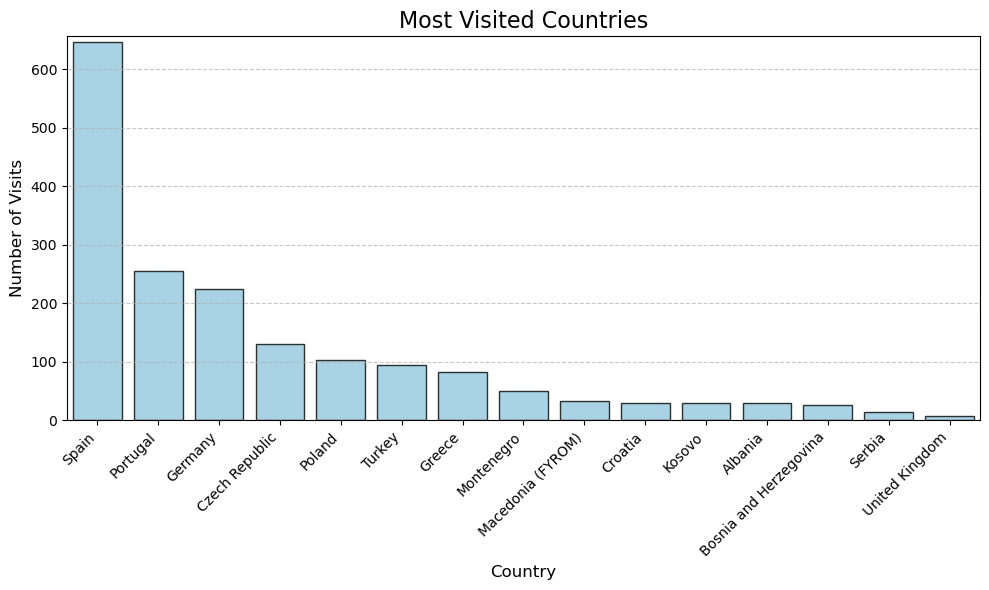

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the visits for each country
country_counts = df['country'].value_counts()

# Set the figure size and style
plt.figure(figsize=(10, 6))

# Create the bar chart
sns.barplot(x=country_counts.index, y=country_counts.values, alpha=0.8, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Most Visited Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)

# Add grid and style the chart
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Set x and y limits for better visualization
plt.xlim(-0.5, len(country_counts)-0.5)
plt.ylim(0, country_counts.max() + 10)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


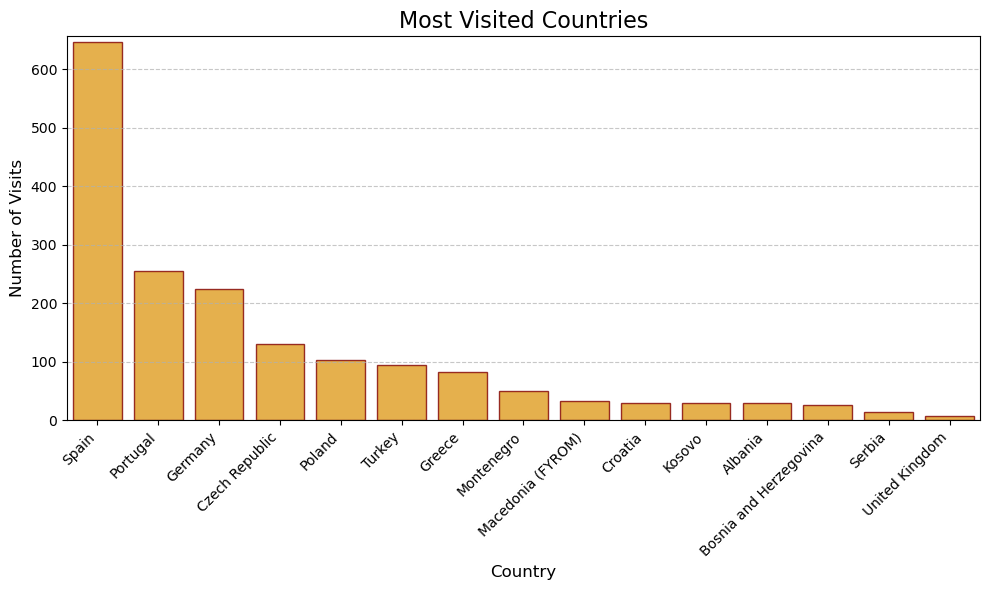

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the visits for each country
country_counts = df['country'].value_counts()

# Set the figure size and style
plt.figure(figsize=(10, 6))

# Create the bar chart with orange bars and maroon edges
sns.barplot(x=country_counts.index, y=country_counts.values, alpha=0.8, color='orange', edgecolor='maroon')

# Add title and labels
plt.title('Most Visited Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)

# Add grid and style the chart
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Set x and y limits for better visualization
plt.xlim(-0.5, len(country_counts)-0.5)
plt.ylim(0, country_counts.max() + 10)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


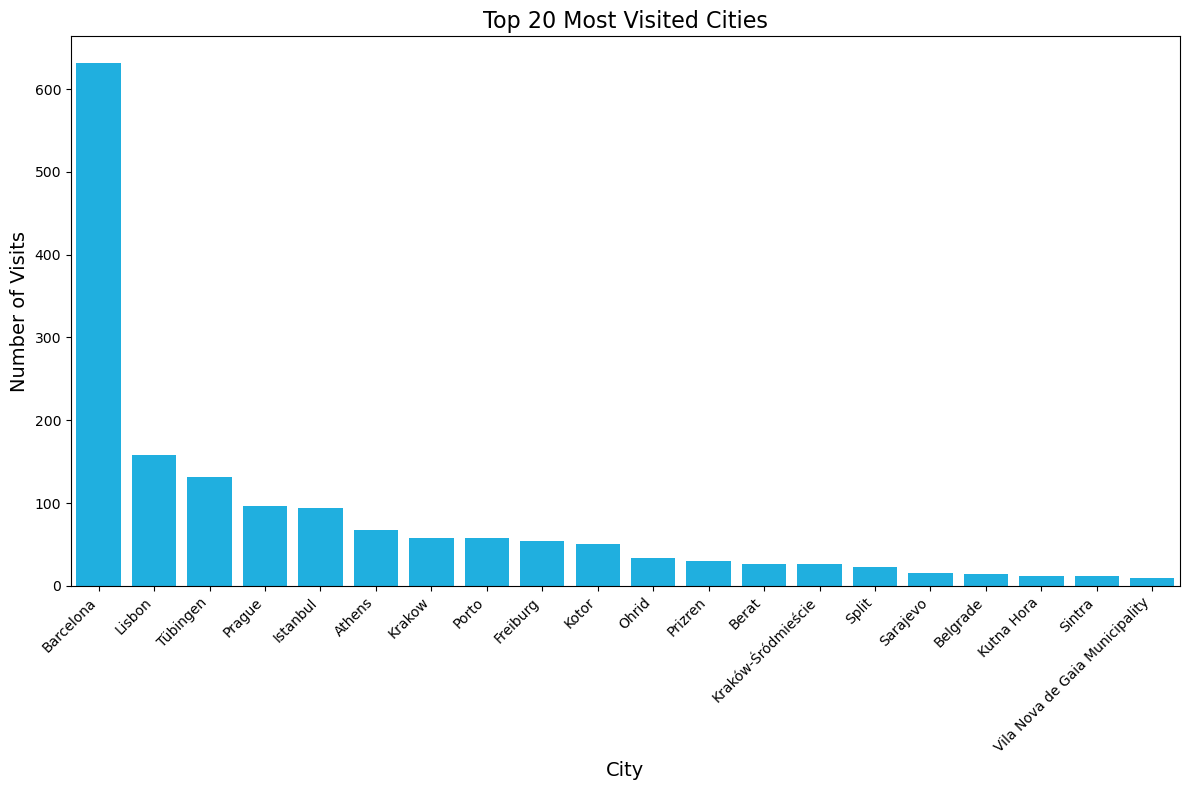

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the visits for each city and select the top 20
city_counts = df['city'].value_counts().head(20)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar chart
sns.barplot(x=city_counts.index, y=city_counts.values, color='deepskyblue')

# Add title and labels
plt.title('Top 20 Most Visited Cities', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Visits', fontsize=14)

# Rotate the x-axis labels to make them readable
plt.xticks(rotation=45, ha='right')  # Align right for better readability

# Show the plot
plt.tight_layout()
plt.show()

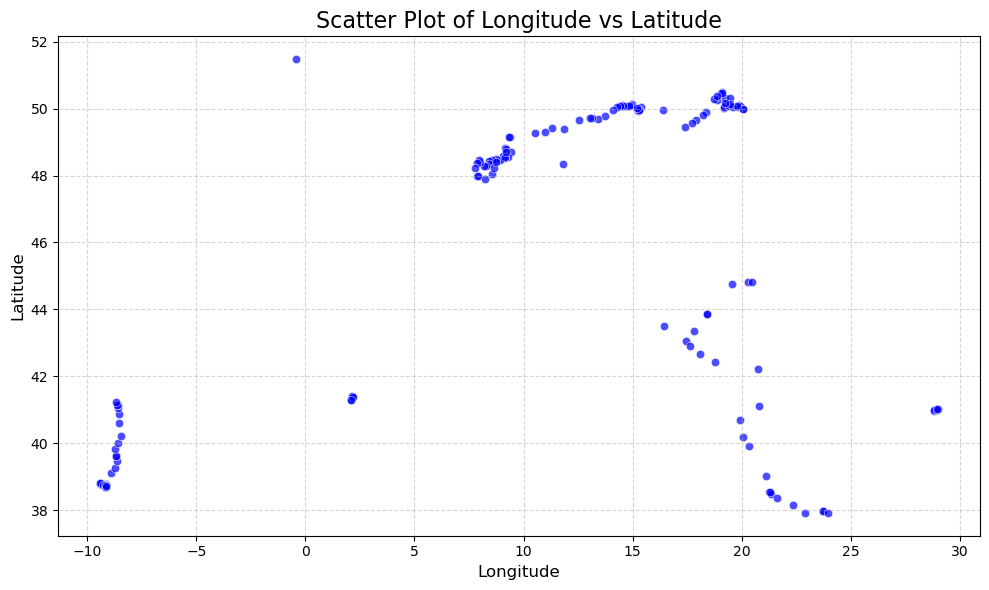

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot using rs dataframe
sns.scatterplot(x=rs['lon'], y=rs['lat'], alpha=0.7, color='blue')

# Add title and labels
plt.title('Scatter Plot of Longitude vs Latitude', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Set grid for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [93]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

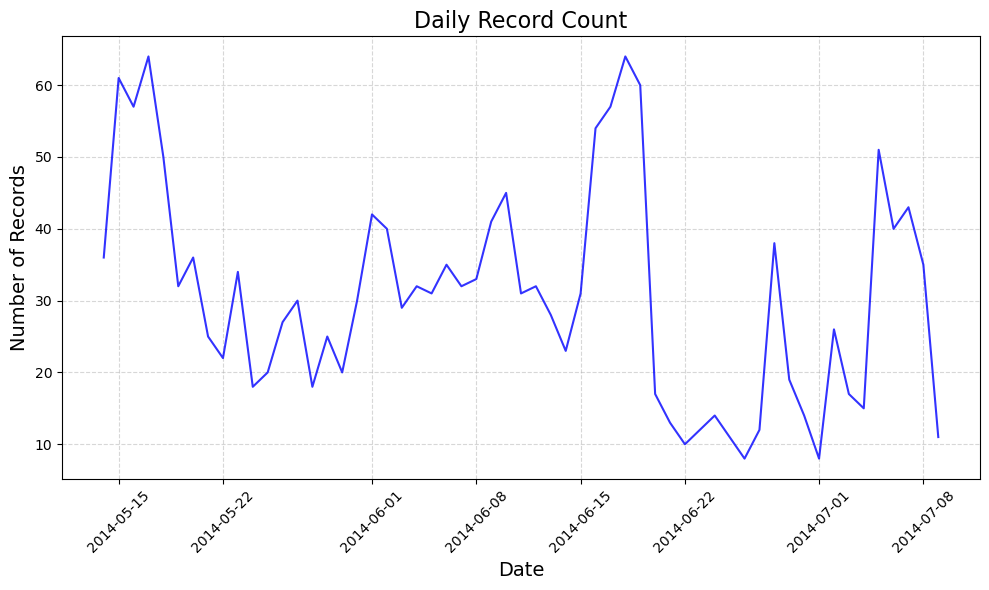

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming countdata is already prepared and contains the count of records by date
# Set the figure size for a nicer appearance
plt.figure(figsize=(10, 6))

# Plot the line chart using seaborn for aesthetic enhancements
sns.lineplot(x=countdata.index, y=countdata, color='blue', alpha=0.8)

# Adding title and labels with appropriate sizes for better visibility and aesthetics
plt.title('Daily Record Count', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Records', fontsize=14)

# Enhancing the grid for better readability, with some transparency
plt.grid(True, linestyle='--', alpha=0.5)

# Rotating the x-axis labels to improve readability and avoid clutter
plt.xticks(rotation=45)

# Adjusting layout to ensure everything fits well and looks tidy
plt.tight_layout()

# Display the plot
plt.show()

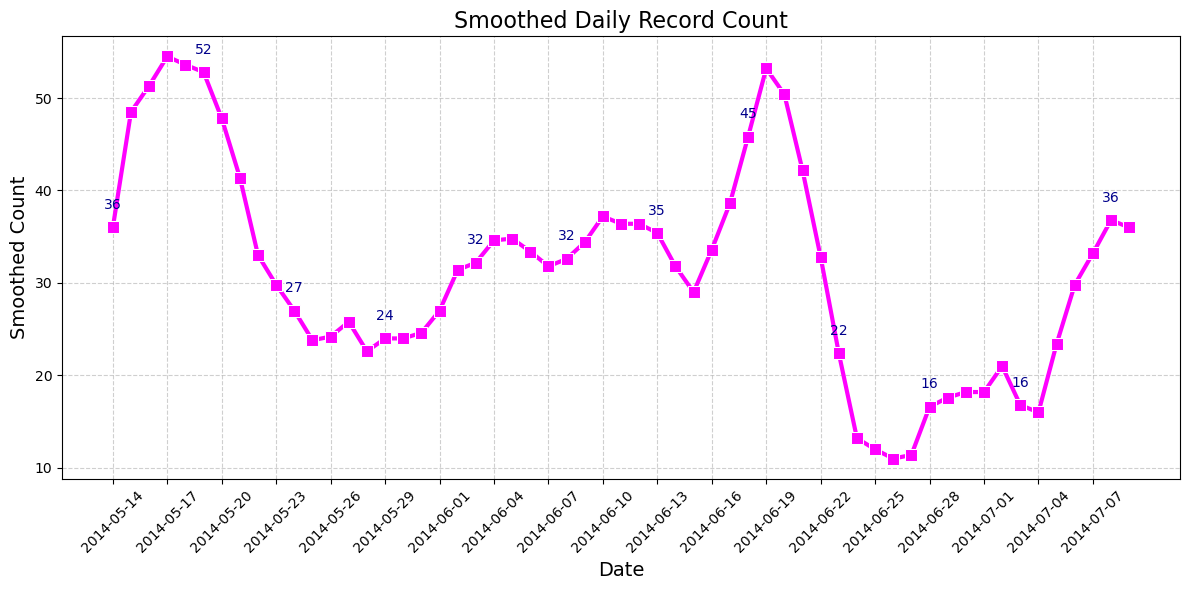

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set the figure size for a clear view
plt.figure(figsize=(12, 6))

# Assuming 'countdata' has been previously created as shown in your screenshots
# Smoothing the data using a rolling window of 5 days
smoothed_data = countdata.rolling(window=5, min_periods=1).mean()

# Create the line chart using seaborn with different aesthetics
sns.lineplot(x=smoothed_data.index, y=smoothed_data, color='magenta', linewidth=3, marker='s', markersize=8)

# Adding title and labels with enhancements
plt.title('Smoothed Daily Record Count', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Smoothed Count', fontsize=14)

# Enhancing the grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Rotate and set the x-axis labels to be 3 days apart for better readability
plt.xticks(ticks=pd.date_range(start=smoothed_data.index.min(), end=smoothed_data.index.max(), freq='3D'), rotation=45)

# Annotating each point with its count, slightly above the point for visibility
for i, count in enumerate(smoothed_data):
    if i % 5 == 0:  # Optionally add annotations every 5 points for clarity
        plt.text(smoothed_data.index[i], count + 2, f'{int(count)}', ha='center', color='darkblue')

# Ensure everything is fitting well in the plot
plt.tight_layout()

# Show the plot
plt.show()


In [99]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


city
Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: count, dtype: int64

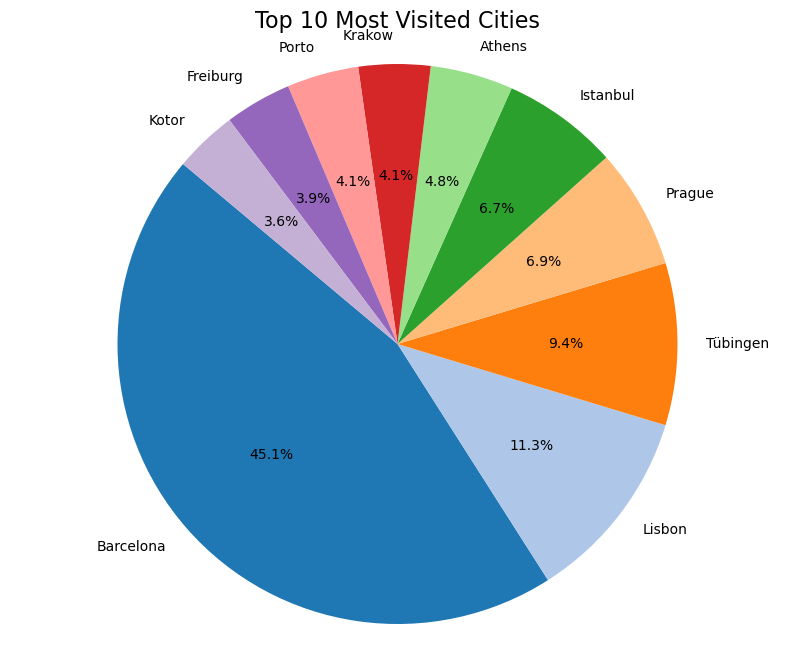

In [101]:
import matplotlib.pyplot as plt

# Extract the top N cities to avoid cluttering the pie chart
top_cities = cities.head(10)

# Create a pie chart
plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Add a title
plt.title('Top 10 Most Visited Cities', fontsize=16)

# Ensure the pie chart is a circle rather than an oval
plt.axis('equal')  

# Display the plot
plt.show()

In [1]:
!pip install keplergl

  Using cached keplergl-0.3.7-py2.py3-none-any.whl
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached traittypes-0.2.1-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached shapely-2.0.7-cp312-cp312-win_amd64.whl.metadata (7.1 kB)
  Using cached jupyter_packaging-0.12.3-py3-none-any.whl.metadata (7.7 kB)
  Using cached geoarrow_pyarrow-0.1.2-py3-none-any.whl.metadata (613 bytes)
  Using cached geoarrow_pandas-0.1.1-py3-none-any.whl.metadata (493 bytes)
  Using cached geoarrow_c-0.1.2-cp312-cp312-win_amd64.whl.metadata (413 bytes)
  Using cached pyarrow_hotfix-0.6-py3-none-any.whl.metadata (3.6 kB)
  Using cached pyogrio-0.10.0-cp312-cp312-win_amd64.whl.metadata (5.6 kB)
  Using cached pyproj-3.7.1-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
 

In [4]:
!pip install ipywidgets

In [28]:
df.index = df.index.strftime('%Y-%m-%d %H:%M:%S')

In [30]:
from keplergl import KeplerGl

map_1 = KeplerGl()
map_1.add_data(data=df, name='GPS Data')

map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'GPS Data': {'index': ['2014-05-14 09:07:00', '2014-05-14 09:22:00', '2014-05-14 10:51:00', '20…

In [32]:
!git add Lab06.ipynb
!git commit -m "Finished Lab06 notebook"
!git push origin PTUALab

'git' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
'git' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
'git' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
